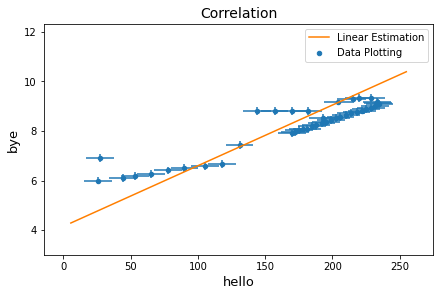

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt 
#Input Sections
File = input('What is the name of your experiment data?: ')
xaxisdata = input('Which Columns do you want to use for x axis to this Data plotting?')
yaxisdata = input('Which Columns do you want to use for y axis to this Data plotting?')
Title = input('What is the title of your Graph?: ')
Xlabel = input('What is the label of x axis?: ')
Ylabel = input('What is the label of y axis?: ')

xaxisdata = int(xaxisdata)
yaxisdata = int(yaxisdata)
df = pd.read_csv(File)
df = df[df > 0]
num = len(df)
Xstd = df[df.columns[xaxisdata]].std()
Ystd = df[df.columns[yaxisdata]].std()

# errors
err_df0 = DataFrame(Xstd/np.sqrt(num -1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
err_df1 =  DataFrame(Ystd/np.sqrt(num - 1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])

#Preparing Plotting Figure & Environment
fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([df[df.columns[xaxisdata]].min() - 40, df[df.columns[xaxisdata]].max() + 40, df[df.columns[yaxisdata]].min() - 3, df[df.columns[yaxisdata]].max() + 3])

#Creating Scatter Graph of Experiment Data
df.plot(kind='scatter', x=df.columns[xaxisdata], y=df.columns[yaxisdata], xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title(Title, fontsize = 14)
axes.set_xlabel(Xlabel, fontsize = 13)
axes.set_ylabel(Ylabel, fontsize = 13)

#Linear Estimation by using Least Squared Regression
df2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()
a = Cov / (df[df.columns[xaxisdata]].std())**2
b = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()
x1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)
l = a.values[0]
k = b.values[0]
y1 = l * x1 + k

#Plotting on the Scatter Graph
axes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')
axes.legend()
plt.show()

In [7]:
from sympy import *
x = symbols('x')
eq = l * x + k
eq

0.0244873658011095*x + 4.14916857861838